### About the Titanic Dataset
### Titanic Data set is a data set filled with the details of people who survived and died in the "unsinkable ship' titanic, 1912. Details such as their Ages, siblings, sexes, embarkment point and the likes.

Data Cleaning/preprocessing


In [1]:
import pandas as pd

In [2]:
titanic_data = pd.read_csv('titanic-passengers (1).csv', sep = ';') #reading through the file

In [3]:
titanic_data.head() #first five details of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
titanic_data.tail() #last five details of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [5]:
titanic_data.isnull().sum() #checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 null values in Age column, 2 in Embarked column and 687 in Cabin column

In [6]:
titanic_data.info() #details of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


The informaton shows that there are 891 entries in total. Age and Embarked column needs to be filled in so as to  be in accordance with the total entries.  Cabin will be dropped because it really has no usefulness in what we are trying to achieve and it has just too many null values 

In [7]:
titanic_data.isnull().sum() #rechecking to see null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_data.describe() #the statistics of the data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This shows the statistics of the dataset

In [9]:
titanic_data.drop('Cabin', axis = 1, inplace = True) #dropped the column because it is 
#not important for the goal we need to achieve


In [10]:
titanic_data.isnull().sum() #rechecking to see if Cabin has been successfully dropped

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
titanic_data['Embarked'].value_counts() #checking for the detail to determine which to fill the missing values

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
titanic_data['Embarked'].fillna('S', inplace = True) # filling the null values with the highest value count

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True) #filling the missing null value using mean

In [14]:
titanic_data['Age'] = titanic_data['Age'].astype(int) #changing Age type from a float to an integer
#firstly because Age cannot be in float but integer such as we cannot have an age of 2.0..
#secondly so it does not eventually affect the model while it is learning the pattern

In [15]:
titanic_data.isnull().sum() #reconfirming there is no null values again

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
titanic_data.head() #first five details

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,S


In [17]:
titanic_data.duplicated().sum() #checking for duplicates

0

In [18]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(titanic_data[['Age', 'Fare']]))
z #checking for outliers

,Age,Fare
0,0.118736,0.386671
1,0.349390,0.494391
2,0.733814,0.490280
3,0.041851,0.224083
4,0.111919,0.398582
...,...,...
886,1.195123,0.042956
887,0.580044,0.502864
888,0.035034,0.474005
889,0.041851,0.489442


In [19]:
len(np.where(z >3)[0]) 
outliers = list(set(np.where(z > 3)[0]))
titanic_data_ = titanic_data.drop(outliers, axis = 0).reset_index(drop = False) #dropping the outliers 
#so the model does not learn noise

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #encoding the categorical data we will be needing in feature engineering to numerical
#because machine understands 0 and 1 and not categorical data

In [21]:
titanic_data['Survived'] = encoder.fit_transform(titanic_data['Survived'])
#we needed to encode survived, Embarked and Sex because 
#we cannot push categorical to machine learning. it is neccesary to convert 
#to numerical data                                   s                                                                                                                        n.                                                           m                                      mnmmnn   mnnnmm                                                                                                                                                                                                                                                                                    bn

In [22]:
titanic_data['Embarked'] = titanic_data['Embarked'].replace({
    'Q' : 1,
    'S' : 2,
    'C' : 3
}) 

In [23]:
titanic_data['Sex'] = titanic_data['Sex'].replace({
    'male' : 0,
    'female' : 1,
})

In [24]:
titanic_data.head()  #confirming to check for a successful encoding

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",0,20,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",0,31,1,0,F.C. 12750,52.0000,2


#### Having studied the data, this is a classification problem because the target variable "survived" is a categorical data and a binary classification. In training and testing the model, the Logistic regression, Knn, Decision Tree and the Randome frest Algorithm will be used to know which gives the best accuracy and which algorithm is much preferable

Logistic Regression

In [25]:
#importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import spicystats as st
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.mlab as mlab
%matplotlib inline

In [26]:
#feature engineering
X = titanic_data[['Pclass','Sex','SibSp','Parch', 'Age', 'Embarked']] 
y = titanic_data['Survived'].values #Identifying the features and label
#to be used in this array and calling them into the X and Y variable  


In [27]:
X.shape #rows and colums 

(891, 6)

In [28]:
y.shape 

(891,)

In [29]:
X #the features we called into the variable we will be training and testing with X

,Pclass,Sex,SibSp,Parch,Age,Embarked
0,2,0,0,0,28,2
1,3,0,0,0,25,2
2,3,0,0,0,20,2
3,3,1,0,4,29,2
4,1,0,1,0,31,2
...,...,...,...,...,...,...
886,2,1,1,0,14,3
887,3,0,0,0,22,3
888,3,1,0,0,30,2
889,3,0,0,0,29,2


In [30]:
y # viewing the details of the label we will be training and testing with converted to an array

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [31]:
titanic_data #viewing the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",0,20,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",0,31,1,0,F.C. 12750,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,3
887,61,0,3,"Sirayanian, Mr. Orsen",0,22,0,0,2669,7.2292,3
888,535,0,3,"Cacic, Miss. Marija",1,30,0,0,315084,8.6625,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29,0,0,349215,7.8958,2


In [32]:
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 20)

model.fit(X_train, y_train) #training and splitting the data into training and testing has 20% was given to the 
#test data and 80% to the training data. This is because more is usually given to the training data. 
#the test is to ensure that the model has learned the patterns well and can produce great results with other data

LogisticRegression()

In [33]:
model.predict(X_test) #predicting the X_test

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1])

In [34]:
X_test

,Pclass,Sex,SibSp,Parch,Age,Embarked
347,2,0,0,0,18,2
674,3,1,0,1,27,2
791,1,1,0,0,30,3
836,3,0,0,0,33,2
56,1,0,0,0,29,3
...,...,...,...,...,...,...
694,3,0,0,0,21,2
428,2,1,0,0,30,1
431,1,1,1,0,35,2
563,1,0,0,1,36,3


In [35]:
model.score(X_test, y_test) #checking for the accuracy score for both X and y test data

0.8268156424581006

In [36]:
print(f'Accuracy = {model.score(X_test,y_test)}')

print('Accuracy = {: 2f}'.format(model.score(X_test,y_test))) #printing the accuracy

Accuracy = 0.8268156424581006
Accuracy =  0.826816


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

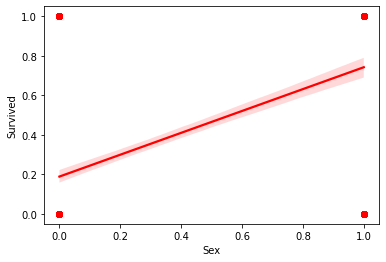

In [37]:
sn.regplot(x='Sex',y='Survived',data = titanic_data, color = 'r') #showing the line of regression between Sex and Survived
#and survived 

#Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

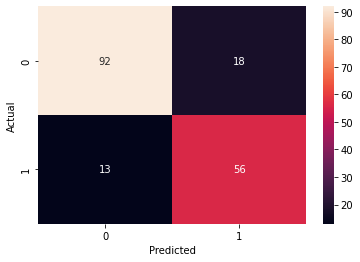

In [38]:
y_pred = model.predict(X_test)

confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot = True)

When the actual True Positive was 92, the  model predicted True Negative was 56
When the actual False Positive was 18, the predicted False Negative was 13
when the actual true positive was 92, the actual false positive was 18
when the predicted true negative was 56, the predicted false negative was 13

The model predicted positive when the actual label is positive
the model predicted negative when the actual label is negative
the model predicted positive when the actual label was negative
the model predicted negative and the actual label was positive


In [39]:
from sklearn.metrics import classification_report
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.76      0.81      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Note:  false means 0 and true means 1
The precision: Out of all the people that the model predicted would survive, only 76% did.
The  recall: out of all the people that actually survived the model only predicted this outcome for only  81%
The f1-score, the value is close to 1(0.78), so it tells us that the model is doing a very good job of predicting whether or not people will survive or not
These values simply tells us how many people belonged to each class in the test dataset. we can see that among the survived, 110 did not survive and 69 did survive.

In [40]:
from sklearn.metrics import roc_curve
#roc curve for models
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label = 1)

#roc curve for tpr = fpr
random_probs = [0 for i in range (len(y_test))]
fpr, tpr,_=roc_curve(y_test, random_probs, pos_label = 1)
print(fpr, tpr,_)

[0. 1.] [0. 1.] [1 0]


In [41]:
from sklearn.metrics import roc_auc_score

#auc scores
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.8239789196310936


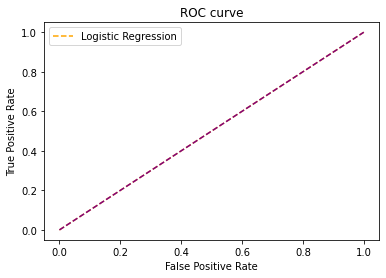

In [42]:
#plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange',label ='Logistic Regression')
plt.plot(fpr, tpr, linestyle ='--',color='purple')

#title
plt.title('ROC curve')
#x label
plt.xlabel('False Positive Rate')
#y label
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
plt.savefig('ROC', dpi=300)
plt.show()

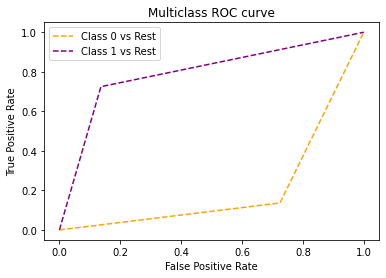

In [154]:
#roc curve for classes
fpr = {}
tpr = {}
thresh = {}

n_class = 2 
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label = i)
    
#plotting
plt.plot(fpr[0], tpr[0], linestyle = '--', color = 'Orange', label = 'Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle = '--', color = 'purple', label = 'Class 1 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc ='best')
plt.savefig('Multiclass ROC', dpi = 300);

KNN

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(5)

In [45]:
x = titanic_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Embarked']]
y = titanic_data['Survived']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 20)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = model.predict(X_test)

In [48]:
print(f'The Accuracy of the test model is {accuracy_score(y_pred,y_test)}')

The Accuracy of the test model is 0.7486033519553073


In [49]:
print(f'The Accuracy of the training model is {accuracy_score(model.predict(X_train),y_train)}')

The Accuracy of the training model is 0.8469101123595506


In [50]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train) #Training KNN classifier
y_pred = knn.predict(x_test)  #Testing
print('Acuuracy=', accuracy_score(y_pred,y_test))

Acuuracy= 0.7486033519553073


In [51]:
scores = []
for k in range(1,20):
    model = KNeighborsClassifier(k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'{k}:{accuracy_score(y_pred,y_test)}')
    scores.append(accuracy_score(y_pred,y_test))

1:0.7430167597765364
2:0.7541899441340782
3:0.7541899441340782
4:0.7541899441340782
5:0.7486033519553073
6:0.7430167597765364
7:0.7374301675977654
8:0.7206703910614525
9:0.7206703910614525
10:0.6983240223463687
11:0.7262569832402235
12:0.7039106145251397
13:0.7318435754189944
14:0.7206703910614525
15:0.7374301675977654
16:0.7206703910614525
17:0.7262569832402235
18:0.7094972067039106
19:0.6927374301675978


The optimal value of k is 2

Text(0.5, 1.0, 'Testing Accuracy for different value of K')

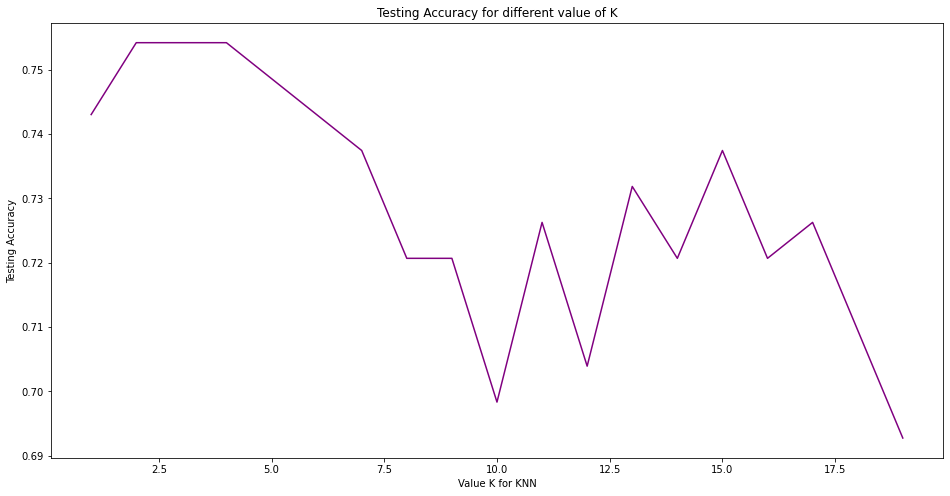

In [52]:
plt.figure(figsize = (16,8))
plt.plot(range(1,20),scores, color = 'purple')
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for different value of K')

Decision Tree

In [69]:
#import relevant libraries
from sklearn.model_selection import train_test_split   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [70]:
x=titanic_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Embarked']]
y= titanic_data["Survived"]

In [71]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [72]:
model = DecisionTreeClassifier(min_samples_leaf = 12)
model.fit(x_train, y_train) #fitting our model
y_pred = model.predict(x_test) #evaluating our model
print('score:{}'. format(accuracy_score(y_test, y_pred)))

score:0.7932960893854749


In [73]:
accuracy_score(model.predict(x_train), y_train)

0.8300561797752809

In [74]:
accuracy_score(model.predict(x_test), y_test)

0.7932960893854749

In [75]:
#tweaking the parameters
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=30)

In [76]:
model = DecisionTreeClassifier(min_samples_leaf = 10)
model.fit(x_train, y_train) #fitting our model
y_pred = model.predict(x_test) #evaluating our model
print('score:{}'. format(accuracy_score(y_test, y_pred)))

score:0.7761194029850746


In [132]:
from sklearn import tree

<Figure size 1152x576 with 0 Axes>

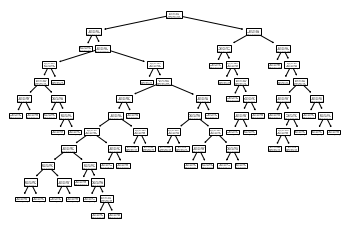

<Figure size 1152x576 with 0 Axes>

In [151]:
tree.plot_tree(model),
colors = 'Red'
plt.figure(figsize = (16,8))


In [81]:
#tweaking the parameters to see the output
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=20)
model = DecisionTreeClassifier(min_samples_leaf = 10)
model.fit(x_train, y_train) #fitting our model
y_pred = model.predict(x_test) #evaluating our model
print('score:{}'. format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


In [82]:
# Random forest

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics

In [125]:
x = titanic_data [['Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Embarked']]
y = titanic_data["Survived"]

In [126]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 20)

In [127]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8100558659217877


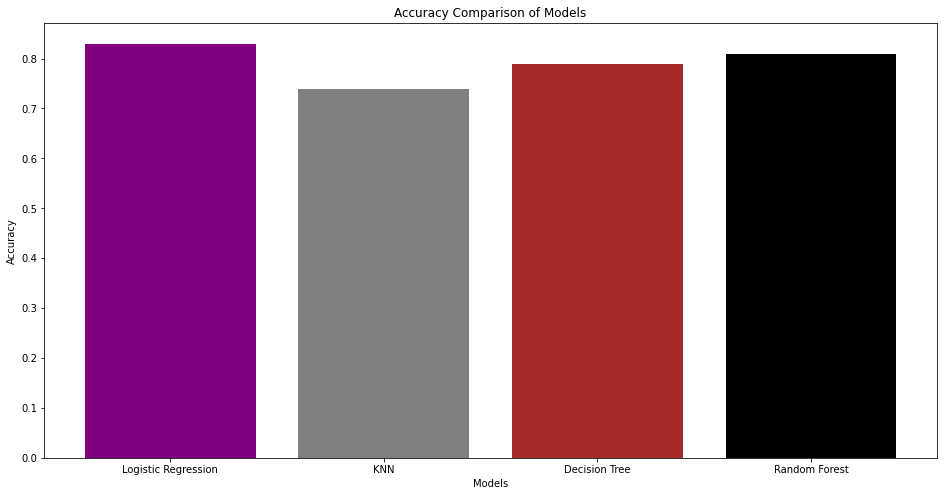

In [143]:
import matplotlib.pyplot as plt
import numpy as np 
fig = plt.figure(figsize = (16,8))
 #define the models and their accuracy scores
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.83, 0.74, 0.79, 0.81]

# specify the colors for each bar
colors = ['purple', 'Grey', 'brown', 'black']

#plot the bar graph
x_pos = np.arange(len(models))
plt.bar(x_pos, accuracy_scores, align ='center', color = colors)
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy Comparison of Models')
plt.show()

This is a summary graph illustrating that the Logisitic Regression is the best Algorithm most applicable.

### Summary
There is an observation in change of accuracy when tuning the parameters in each Algorithm. Either there is an increase or decrease. This is evident in the codes for Decision tree, a sample of tuned parameter and different accuracy output can be seen 


